## Fashion MNIST


#Multi Layer Perceptron

Unzip the csv file

In [ ]:
!unzip '/content/Fashion MNIST.zip'
[n]


Archive:  /content/Fashion MNIST.zip
replace fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

* Load the data
* Import the libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
x = train.drop('label',axis = 1)
y = train['label']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 123)

In [ ]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_report = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print(round(acc_score,2))
  print(class_report)
  print(conf_matrix)

In [9]:
mlp = MLPClassifier ( hidden_layer_sizes=(64,64,64) , random_state = 10 , verbose = 1 )
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.60098177
Iteration 2, loss = 0.72331256
Iteration 3, loss = 0.59342980
Iteration 4, loss = 0.53215677
Iteration 5, loss = 0.48334242
Iteration 6, loss = 0.45461304
Iteration 7, loss = 0.43142469
Iteration 8, loss = 0.42017151
Iteration 9, loss = 0.40041187
Iteration 10, loss = 0.39245965
Iteration 11, loss = 0.37796074
Iteration 12, loss = 0.37314505
Iteration 13, loss = 0.36754031
Iteration 14, loss = 0.36451711
Iteration 15, loss = 0.36327486
Iteration 16, loss = 0.34666544
Iteration 17, loss = 0.34294634
Iteration 18, loss = 0.33086410
Iteration 19, loss = 0.34254179
Iteration 20, loss = 0.32573463
Iteration 21, loss = 0.32571811
Iteration 22, loss = 0.31512881
Iteration 23, loss = 0.31630397
Iteration 24, loss = 0.31205375
Iteration 25, loss = 0.31160782
Iteration 26, loss = 0.30586170
Iteration 27, loss = 0.29749988
Iteration 28, loss = 0.29832119
Iteration 29, loss = 0.29837811
Iteration 30, loss = 0.29148997
Iteration 31, loss = 0.29556415
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(64, 64, 64), random_state=10, verbose=1)

In [10]:
y_hat_train_mlp = mlp.predict(x_train)
y_hat_test_mlp = mlp.predict(x_test)

In [11]:
model_eval(y_train , y_hat_train_mlp)

0.95
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4860
           1       1.00      0.99      1.00      4759
           2       0.88      0.91      0.89      4788
           3       0.98      0.94      0.96      4851
           4       0.89      0.91      0.90      4850
           5       1.00      0.99      1.00      4776
           6       0.88      0.84      0.86      4792
           7       0.99      0.99      0.99      4773
           8       0.99      1.00      0.99      4776
           9       0.99      1.00      0.99      4775

    accuracy                           0.95     48000
   macro avg       0.95      0.95      0.95     48000
weighted avg       0.95      0.95      0.95     48000

[[4571    0   22   15    8    0  234    0   10    0]
 [   9 4728    3    8    3    0    8    0    0    0]
 [  50    0 4354   10  219    0  147    0    8    0]
 [ 115    1   19 4546  103    1   64    0    2    0]
 [   8    2  297   44 43

In [12]:
model_eval(y_test,y_hat_test_mlp)

0.87
              precision    recall  f1-score   support

           0       0.76      0.83      0.80      1140
           1       0.98      0.96      0.97      1241
           2       0.77      0.80      0.79      1212
           3       0.90      0.83      0.86      1149
           4       0.78      0.79      0.79      1150
           5       0.98      0.95      0.97      1224
           6       0.70      0.65      0.67      1208
           7       0.94      0.94      0.94      1227
           8       0.95      0.97      0.96      1224
           9       0.93      0.96      0.95      1225

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000

[[ 950    5   21   14    3    1  137    0    9    0]
 [   7 1195    7   18    7    0    4    0    2    1]
 [  24    1  971   15  109    1   84    0    7    0]
 [  69   17   15  957   53    1   31    0    4    2]
 [   8    2  123   35  9

# Keras

* Import the libraries

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

One hot encode

In [14]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [15]:
y_train_ohe

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
y_test_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

* Declare the model
* DEclare the layers

In [17]:
model = Sequential()

In [18]:
model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,210 (231.29 KB)

 Trainable params: 59,210 (231.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Fit the model

In [27]:
hist = model.fit (x_train,y_train_ohe, batch_size = 120 ,epochs =100 , validation_data = (x_test,y_test_ohe))

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9302 - loss: 0.1854 - val_accuracy: 0.8724 - val_loss: 0.5783
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9330 - loss: 0.1811 - val_accuracy: 0.8695 - val_loss: 0.5282
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9328 - loss: 0.1769 - val_accuracy: 0.8772 - val_loss: 0.5114
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9339 - loss: 0.1694 - val_accuracy: 0.8792 - val_loss: 0.5168
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9343 - loss: 0.1745 - val_accuracy: 0.8795 - val_loss: 0.5418
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9333 - loss: 0.1759 - val_accuracy: 0.8788 - val_loss: 0.5419
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9336 - loss: 0.1736 - val_accuracy: 0.8774 - val_loss: 0.5340
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9326 - loss: 0.1817 - val_a

In [28]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

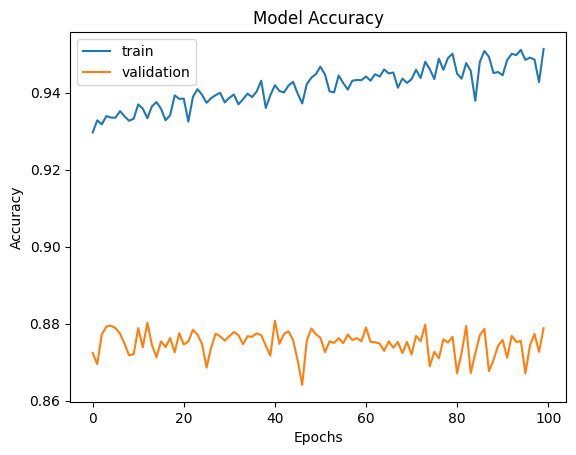

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc = 'upper left')

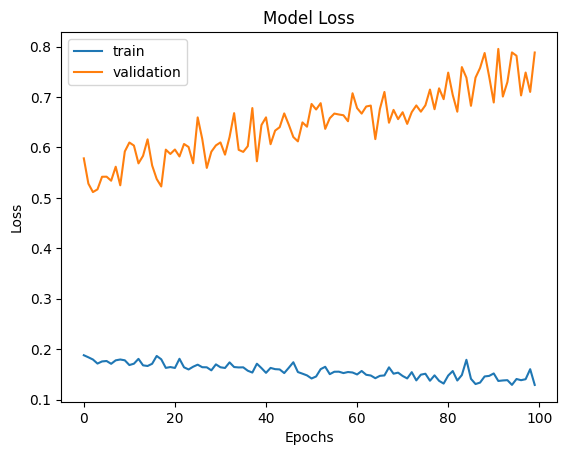

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc = 'upper left')

In [31]:
y_hat_train_dense = np.argmax(model.predict(x_train),axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
model_eval(y_train,y_hat_train_dense)

0.96
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4860
           1       1.00      1.00      1.00      4759
           2       0.92      0.90      0.91      4788
           3       0.97      0.96      0.96      4851
           4       0.86      0.94      0.90      4850
           5       1.00      1.00      1.00      4776
           6       0.89      0.85      0.87      4792
           7       1.00      1.00      1.00      4773
           8       1.00      0.99      0.99      4776
           9       1.00      1.00      1.00      4775

    accuracy                           0.96     48000
   macro avg       0.96      0.96      0.96     48000
weighted avg       0.96      0.96      0.96     48000

[[4510    0   15   34    7    0  288    0    6    0]
 [   6 4745    1    5    0    0    2    0    0    0]
 [  42    0 4289   18  316    0  123    0    0    0]
 [  19    0    6 4637  163    0   24    0    2    0]
 [   1    0  192   39 45

In [33]:
model_eval(y_test,y_hat_test_dense)

0.88
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1140
           1       0.99      0.97      0.98      1241
           2       0.80      0.80      0.80      1212
           3       0.89      0.88      0.88      1149
           4       0.76      0.84      0.80      1150
           5       0.97      0.95      0.96      1224
           6       0.72      0.66      0.69      1208
           7       0.93      0.95      0.94      1227
           8       0.96      0.96      0.96      1224
           9       0.95      0.96      0.95      1225

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000

[[ 934    1   17   38    6    1  136    0    7    0]
 [   6 1201    2   20    4    1    6    0    1    0]
 [  17    1  974   18  124    1   74    0    3    0]
 [  35   10    9 1006   58    1   28    0    1    1]
 [   5    2  100   26  9

# Dropout Layer

In [34]:
model = Sequential()
model.add(Dense(512,activation ='relu',input_shape = (784,)))   #Layer 1 and Input Layer
model.add(Dropout(0.2))    #Dropout Layer
model.add(Dense(512,activation='relu'))       # Layer2
model.add(Dropout(0.2))    #Dropout Layer
model.add(Dense(512,activation = 'relu'))      # Layer 3
model.add(Dropout(0.2))    #Dropout Layer
model.add(Dense(10,activation = 'softmax'))    #Output Layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,362 (3.56 MB)

 Trainable params: 932,362 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy' , metrics = ['accuracy'])

In [37]:
hist = model.fit(x_train, y_train_ohe , batch_size = 120 , epochs = 100 , validation_data = (x_test,y_test_ohe))

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6300 - loss: 11.5082 - val_accuracy: 0.8043 - val_loss: 0.5695
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7669 - loss: 0.6982 - val_accuracy: 0.8145 - val_loss: 0.5269
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7973 - loss: 0.5794 - val_accuracy: 0.8363 - val_loss: 0.4471
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.8213 - loss: 0.5091 - val_accuracy: 0.8453 - val_loss: 0.4292
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.8253 - loss: 0.4889 - val_accuracy: 0.8460 - val_loss: 0.4487
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.8282 - loss: 0.4761 - val_accuracy: 0.8460 - val_loss: 0.4219
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.8332 - loss: 0.4729 - val_accuracy: 0.8523 - val_loss: 0.4053
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.8380 - loss: 

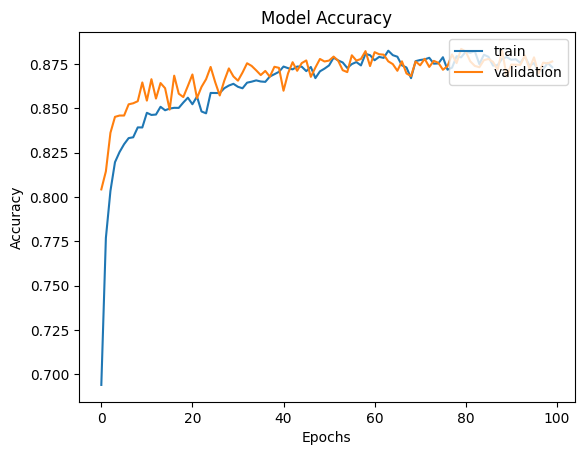

In [38]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc = 'upper right')

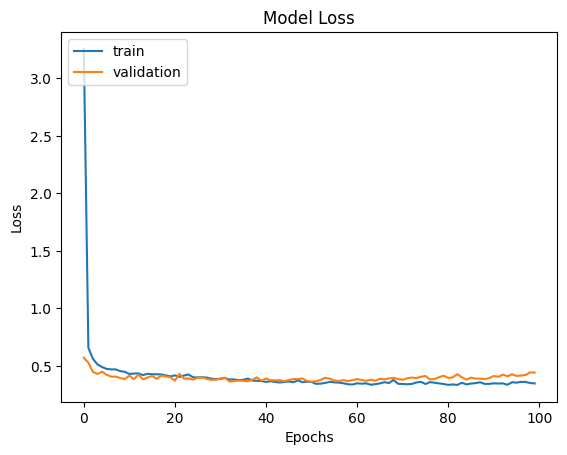

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc = 'upper left')

In [40]:
y_hat_train_dense = np.argmax(model.predict(x_train),axis = 1)
y_hat_test_dense = np.argmax(model.predict(x_test) , axis = 1)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [41]:
model_eval(y_train,y_hat_train_dense)

0.9
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4860
           1       0.99      0.99      0.99      4759
           2       0.76      0.86      0.81      4788
           3       0.93      0.91      0.92      4851
           4       0.78      0.81      0.80      4850
           5       0.99      1.00      0.99      4776
           6       0.78      0.65      0.71      4792
           7       0.98      0.99      0.98      4773
           8       0.99      0.98      0.99      4776
           9       0.99      0.97      0.98      4775

    accuracy                           0.90     48000
   macro avg       0.90      0.90      0.90     48000
weighted avg       0.90      0.90      0.90     48000

[[4236    4   74  159   11    0  367    0    9    0]
 [   2 4718    5   27    5    0    1    0    1    0]
 [  50    0 4131   15  448    0  140    0    4    0]
 [  46   27   31 4397  306    0   42    0    2    0]
 [   5    4  567   41 392

In [42]:
model_eval(y_test,y_hat_test_dense)

0.88
              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1140
           1       0.98      0.98      0.98      1241
           2       0.74      0.82      0.78      1212
           3       0.90      0.85      0.87      1149
           4       0.73      0.78      0.76      1150
           5       0.96      0.98      0.97      1224
           6       0.74      0.62      0.68      1208
           7       0.94      0.96      0.95      1227
           8       0.97      0.98      0.98      1224
           9       0.97      0.94      0.96      1225

    accuracy                           0.88     12000
   macro avg       0.88      0.87      0.87     12000
weighted avg       0.88      0.88      0.88     12000

[[ 956    3   28   44    6    2   97    0    4    0]
 [   1 1218    4   15    1    0    1    0    1    0]
 [  10    0  991   12  138    0   60    0    1    0]
 [  31   14    9  976  103    0   15    0    1    0]
 [   4    2  145   17  9